# Classfication:

## The Data
Breast cancer wisconsin (diagnostic) dataset
Data Set Characteristics:

Number of Instances: 569

Number of Attributes: 30 numeric, predictive attributes and the class

## Attribute Information:

    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.

W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA:

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

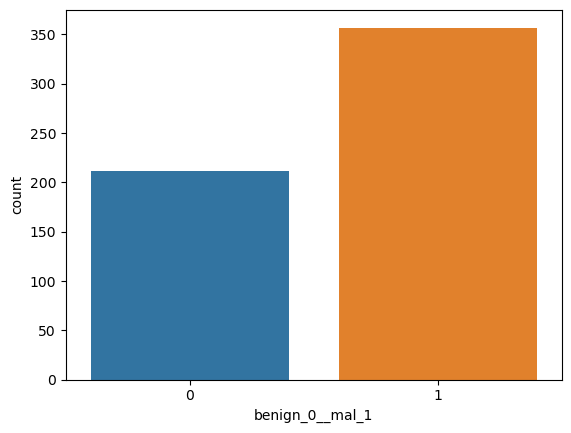

In [12]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [18]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

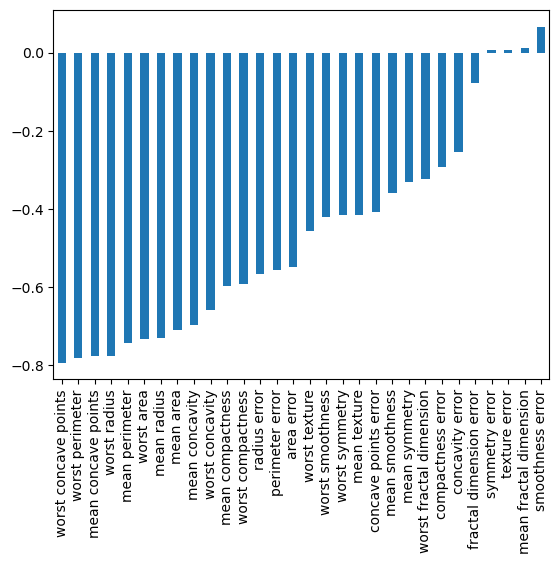

In [13]:
#Feature Correlations with Target column
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

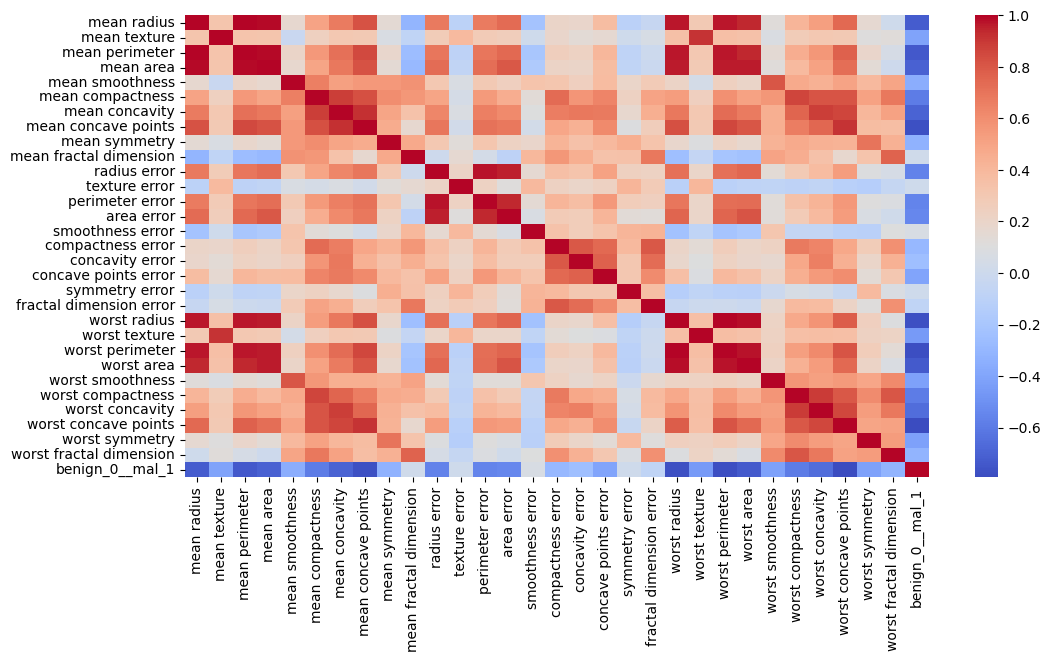

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap = 'coolwarm')

# Splitting Data:

In [20]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
#Scaling Data:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

# Building Simple Deep Learning Model:

In [27]:
from tensorflow.keras.models import Sequential

2024-02-21 10:31:52.145851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30, activation='relu')) #30 neurons (units) since there are 30 features based off X_train.shape

model.add(Dense(15, activation='relu'))
#BINARY CLASSIFICATION: Last Activation function is sigmoid for binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [31]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data= (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.6925 - val_loss: 0.6658
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6457 - val_loss: 0.6262
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5993 - val_loss: 0.5744
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5504 - val_loss: 0.5269
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5030 - val_loss: 0.4808
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4572 - val_loss: 0.4300
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4098 - val_loss: 0.3824
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3697 - val_loss: 0.3449
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3330 - val_loss: 0.3082
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3090 - val_loss: 0.2818
Epoch 11

In [32]:
#Plot losses compared to validation data
losses = pd.DataFrame(model.history.history)

<Axes: >

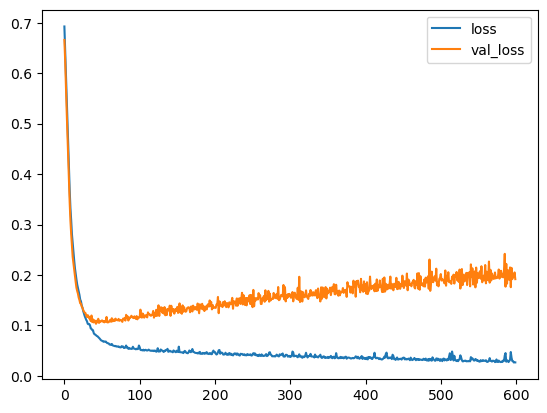

In [33]:
losses.plot()

In [34]:
#Use early stopping to stop training when enough epochs have been done

In [35]:
#Redefining Model:

model = Sequential()

model.add(Dense(30, activation='relu')) #30 neurons (units) since there are 30 features based off X_train.shape

model.add(Dense(15, activation='relu'))
#BINARY CLASSIFICATION: Last Activation function is sigmoid for binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience = 25)

In [39]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data= (X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 3s 39ms/step - loss: 0.7054 - val_loss: 0.6696
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6573 - val_loss: 0.6321
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6176 - val_loss: 0.5943
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5758 - val_loss: 0.5466
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5314 - val_loss: 0.4961
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4812 - val_loss: 0.4483
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4359 - val_loss: 0.4010
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3924 - val_loss: 0.3567
Epoch 9/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3543 - val_loss: 0.3194
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3238 - val_loss: 0.2903
Epoch 1

<Axes: >

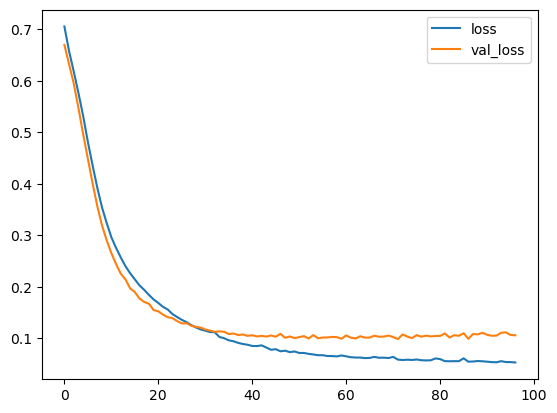

In [40]:
#Plotting loss of new model with eary stop:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [41]:
#Redefining Model with dropout layers to prevent overfitting:

model = Sequential()

model.add(Dense(30, activation='relu')) #30 neurons (units) since there are 30 features based off X_train.shape
model.add(Dropout(rate=0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))


#BINARY CLASSIFICATION: Last Activation function is sigmoid for binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [42]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data= (X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6976 - val_loss: 0.6838
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6838 - val_loss: 0.6730
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6744 - val_loss: 0.6576
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6584 - val_loss: 0.6400
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6454 - val_loss: 0.6197
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6237 - val_loss: 0.5913
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6231 - val_loss: 0.5711
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5938 - val_loss: 0.5492
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5741 - val_loss: 0.5276
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5403 - val_loss: 0.4963
Epoch 11

<Axes: >

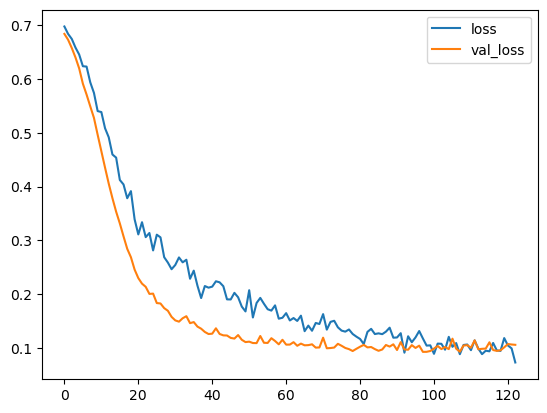

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
predictions = (model.predict(X_test) > 0.5).astype('int')

5/5 [==============================] - 0s 3ms/step


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [47]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
